In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import statsmodels.api as sm

In [35]:
# from tensorflow import keras
# from tensorflow.keras import layers

In [2]:
concrete = pd.read_csv('Concrete_Data.csv')
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [3]:
concrete.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [4]:
concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Prepare the data: load it, normalize it, and split it into training and testing.

In [5]:
scaler = preprocessing.MinMaxScaler()
names = concrete.columns
d = scaler.fit_transform(concrete)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176,0.967485
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176,0.741996
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011,0.472655
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000,0.482372
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264,0.522860


In [6]:
X = scaled_df.iloc[:,0:8] # Features
y = scaled_df.iloc[:, 8]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

### Train a sequential neural network, using stochastic gradient descent as the optimizer and mean squared error as the loss function. Pass metrics to the model that evaluate its performance. No. of layers and choosing parameters may take some trial and error.

In [30]:
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(5, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1))

# compile the model
model.compile(optimizer='sgd', loss='mse', metrics=['RootMeanSquaredError'])

# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=1, verbose=0)

# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE, RMSE: ', error)

MSE, RMSE:  [0.007504472509026527, 0.08662835508584976]


### Model Summary

<br>

**Step 1: Define the Model. Setting up the layers.**

- Per rules of thumb, one hidden layer would suffice for vast number of applications. This dataset is not a complicated one and therefore one hidden layer is selected. 
- Additionally, the amount of nodes usually falls under 2/3 of the input layer. In our case we have 8 inputs and therefore we can experiment with 4-6 nodes. After comparing, 5 nodes seemed to yield lower MSE. 
- Activation function: After trying sigmoid and relu, relu seemed to yield better result than sigmoid. Sigmoid could be more commonly used in classification questions, and in our case we are solving a regression problem, hence selecting relu.

**Step2: Compile the Model with optimizer, loss function and metrics.**

- Metrics: We select RMSE as metrics to better evaluate the result of a regression (numerical) output. 

**Step 3: Fit the Model**

- epochs / batch size: As we ae using Stochastic Gradient Descent as our optimizer, we choose the batch size of 1 to iterate through one sample at a time. As for number of iteration of the dataset, we choose epoch = 100 as commonly used. In theory, epoch is usually large to allow the learning algorithm to run until the error from the model has been sufficiently minimized. 

**Step 4: Evaluate the Model**
- The model has a low RMSE of 0.087 and MSE of 0.0075.  

### Use predict to make predictions on the testing dataset. How do predictions compare with the true values?

- The predictions from the testing set have generally low error rates.
- From the predicted vs actual plot, the performance seemed reasonably well. 

In [32]:
y_pred = model.predict(X_test)
NN_mae = metrics.mean_absolute_error(y_test, y_pred)
NN_mse = metrics.mean_squared_error(y_test, y_pred)
NN_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', NN_mae)
print('Mean Squared Error:', NN_mse)
print('Root Mean Squared Error:', NN_rmse)

Mean Absolute Error: 0.0649183040084468
Mean Squared Error: 0.007504472092050086
Root Mean Squared Error: 0.08662835616615432


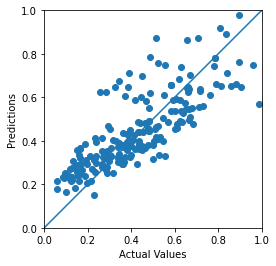

In [26]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [33]:
X_intercept = sm.add_constant(X_train)            #to add constant value in the model

OLSmodel = sm.OLS(y_train,X_intercept).fit()         #fitting the model

In [28]:
X_intercept_test = sm.add_constant(X_test)  
y_pred_linreg = OLSmodel.predict(X_intercept_test)

In [34]:
lm_mae = metrics.mean_absolute_error(y_test, y_pred_linreg)
lm_mse = metrics.mean_squared_error(y_test, y_pred_linreg)
lm_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_linreg))

print('Mean Absolute Error:', lm_mae)
print('Mean Squared Error:', lm_mse)
print('Root Mean Squared Error:', lm_rmse)

Mean Absolute Error: 0.10030422734800123
Mean Squared Error: 0.016234804865663758
Root Mean Squared Error: 0.12741587368010218


In [41]:
mae_comparison = (NN_mae - lm_mae)/lm_mae*100
mse_comparison = (NN_mse - lm_mse)/lm_mse*100
rmse_comparison = (NN_rmse - lm_rmse)/lm_rmse*100

print('NN reduction vs lm Mean Absolute Error in %:', mae_comparison)
print('NN reduction vs lm Mean Squared Error in %:', mse_comparison)
print('NN reduction vs lm Root Mean Squared Error in %:', rmse_comparison)

NN reduction vs lm Mean Absolute Error in %: -35.27859620191728
NN reduction vs lm Mean Squared Error in %: -53.77540934956432
NN reduction vs lm Root Mean Squared Error in %: -32.011331348205026
